
# Special Topics in Astrodynamics | ae4889

## Time-series prediction on a simple function

#### Import the required packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

C:\Users\pedro\Miniconda3\envs\specialTopics\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pedro\Miniconda3\envs\specialTopics\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pedro\Miniconda3\envs\specialTopics\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pedro\Miniconda3\envs\specialTopics\l

1.13.1


## Generate a dataset for training & validation

Generate your data
* Examine sine waves with a few different amplitudes and frequencies to assess peformance and robustness.
* Start with `sin(x)`.

In [3]:
nPoints = 5000
A = 1
T = 12*2*np.pi
nPast = 2

data = []
for x in np.arange(0,nPoints):
    y = A*np.sin(float(x)*(2*np.pi)/T)
    x = (x%(T))/(T)
    data.append([x,y])
data = np.array(data)

past = np.zeros((int(nPoints), int(nPast)))

for i in np.arange(int(nPast),int(nPoints)):
    past[i,:] = data[i-int(nPast):i,1]
# np.vsplit(past,nPoints)

Create a `pandas` dataframe for it

In [4]:
pdata = pd.DataFrame({'x':data[:,0],'y':data[:,1]})
#pdata # This displays the DataFrame if uncommented.

pdata2 = pd.DataFrame(past, columns=np.arange(-nPast,0))
pdata2['x'] = data[:,0]
pdata2['y'] = data[:,1]
pdata2 = pdata2.drop(np.arange(nPast))
pdata2

,-2,-1,x,y
2,0.000000,0.083237,0.026526,0.165896
3,0.083237,0.165896,0.039789,0.247404
4,0.165896,0.247404,0.053052,0.327195
5,0.247404,0.327195,0.066315,0.404715
6,0.327195,0.404715,0.079577,0.479426
...,...,...,...,...
4995,0.984254,0.995551,0.248245,0.999939
4996,0.995551,0.999939,0.261508,0.997387
4997,0.999939,0.997387,0.274771,0.987913
4998,0.997387,0.987913,0.288034,0.971581


Visual check of the dataset

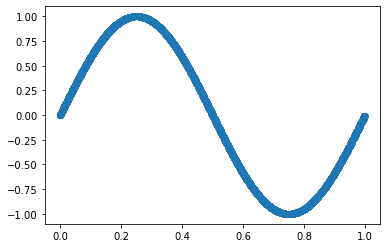

In [5]:
%matplotlib inline
plt.scatter(pdata['x'],pdata['y'])

Split the dataset into training and testing sets

In [6]:
train_dataset = pdata.sample(frac=0.8, random_state=0)
test_dataset = pdata.drop(train_dataset.index)

train_dataset2 = pdata2.sample(frac=0.8, random_state=0)
test_dataset2 = pdata2.drop(train_dataset2.index)

Split features from labels

In [7]:
train_labels = train_dataset.pop('y')
test_labels = test_dataset.pop('y')

train_labels2 = train_dataset2.pop('y')
test_labels2 = test_dataset2.pop('y')

##### Create a model

In [8]:
def build_model():
    model = keras.Sequential([
        layers.Dense(25, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(25, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])
    return model

def build_model2():
    model = keras.Sequential([
        layers.Dense(25, activation='relu', input_shape=[len(train_dataset2.keys())]),
        layers.Dense(25, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])
    return model

In [9]:
model = build_model()
model2 = build_model2()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [10]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 776
Trainable params: 776
Non-trainable params: 0
_________________________________________________________________


#### Train the model

In [11]:
history = model2.fit(train_dataset2, train_labels2, validation_split=0.2, epochs=7)

Train on 3198 samples, validate on 800 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/7
3198/3198 [==============================] - 0s 73us/sample - loss: 0.2150 - acc: 3.1270e-04 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 2/7
3198/3198 [==============================] - 0s 27us/sample - loss: 0.0037 - acc: 3.1270e-04 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 3/7
3198/3198 [==============================] - 0s 26us/sample - loss: 9.9521e-04 - acc: 3.1270e-04 - val_loss: 4.3414e-04 - val_acc: 0.0000e+00
Epoch 4/7
3198/3198 [==============================] - 0s 27us/sample - loss: 2.4033e-04 - acc: 3.1270e-04 - val_loss: 1.3960e-04 - val_acc: 0.0000e+00
Epoch 5/7
3198/3198 [==============================] - 0s 28us/sample - loss: 8.9875e-05 - acc: 3.1270e-04 - val_loss: 6.9242e-05 - val_acc: 0.0000e+00
Epoch 6/7
3198/3198 [==============================] - 0s 27us/sample - loss: 5.3923e-05 - acc: 3.1270e-04 - val_loss: 4.7653e-05 - val_acc: 0.0000e+00
Epoch 7/7

Visualize the model's training progress via the history object

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
2,0.000995,0.000313,0.000434,0.0,2
3,0.000240,0.000313,0.000140,0.0,3
4,0.000090,0.000313,0.000069,0.0,4
5,0.000054,0.000313,0.000048,0.0,5
6,0.000039,0.000313,0.000037,0.0,6


## Basic regression: predict future values of the sine function

#### Predict with the model

If you trained on `n` points (eg. `n = 49`), now predict the value of point `n+1`

Once you have predicted a single future point, develop a 'rolling' predictor which drops the first point and predicts point `n+2` based on the set of points `[2,n+1]`.

Examine the quality of the results for the mechanism to predict points into the future.

____

#### Plot the history

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

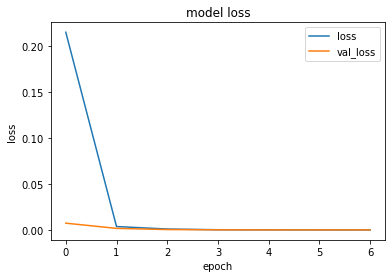

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

Are `10` epochs too few? If so, try training for more epochs.

In [14]:
test_predictions2 = model2.predict(test_dataset2).flatten()

### Make predictions

Finally, predict values using data in the test set:

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(-2.0, 2.0)

(-2.0, 2.0)

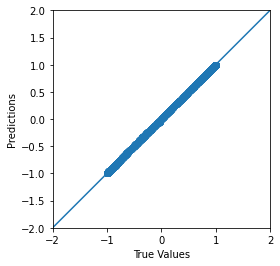

In [15]:
test_predictions2 = model2.predict(test_dataset2).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels2, test_predictions2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim([-2,2])
plt.ylim([-2,2])
_ = plt.plot([-2,2], [-2,2])

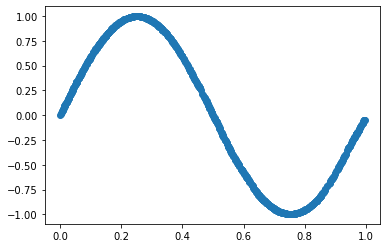

In [16]:
%matplotlib inline
plt.scatter(test_dataset2['x'],test_predictions2)

Take a look at the error distribution.

(array([  5.,   1.,   2.,  14.,  20.,  10.,  16.,  14.,  28.,  75., 135.,
        116.,  97., 142.,  82.,  50.,  79.,  39.,  23.,  18.,  20.,   2.,
          1.,   4.,   7.]),
 array([-0.01827377, -0.01678514, -0.01529651, -0.01380788, -0.01231926,
        -0.01083063, -0.009342  , -0.00785337, -0.00636474, -0.00487611,
        -0.00338748, -0.00189886, -0.00041023,  0.0010784 ,  0.00256703,
         0.00405566,  0.00554429,  0.00703292,  0.00852154,  0.01001017,
         0.0114988 ,  0.01298743,  0.01447606,  0.01596469,  0.01745332,
         0.01894194]),
 <a list of 25 Patch objects>)

Text(0.5, 0, 'Prediction Error')

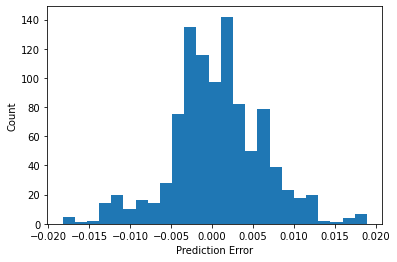

In [17]:
error = test_predictions2 - test_labels2
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [18]:
nMax = 750

data = []
for x in np.arange(0,nMax):
    if x<nPast:
        y = A*np.sin(float(x)*(2*np.pi)/T)
    else:
        y = 0
    xn = (x%(T))/(T)
    data.append([xn,x,y])
data = np.array(data)

# past = np.zeros((1, int(nPast)))
past = data[0:int(nPast),2]

test = pd.DataFrame([past], columns=np.arange(-nPast,0))
test.loc[:,'x'] = data[int(nPast),0]
test.loc[:,'y'] = data[int(nPast),2]

df1 = pd.DataFrame({'xn':data[:,0], 'x':data[:,1], 'y':data[:,2]})

for i in np.arange(0,int(nMax-nPast)):
    test.loc[i,'y'] = model2.predict(test.iloc[i:i+1,:].drop('y',axis=1))
    if i != int(nMax-nPast-1):
        test.loc[i+1,0:nPast-1] = test.iloc[i,:].shift(-1)
        test.loc[i+1,-1] = test.loc[i,'y']
        test.loc[i+1,'x'] = df1.loc[i+nPast+1,'xn']

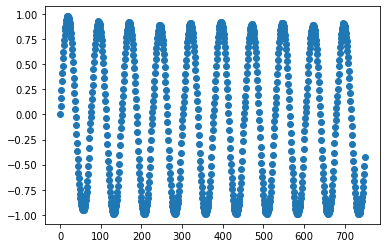

In [19]:
ynew = np.append(df1.loc[:nPast-1,'y'], test.loc[:,'y'])

%matplotlib inline
plt.scatter(df1['x'],ynew)

____

## Questions to consider

* How well does your ANN predict beyond the range of data it was trained on?

See the Phase 1 assignment description for additional guidance.

____

## Copyright & license details